In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prompts_comparision = pd.read_csv("translations_scores/system_custom_dataset_prompts_comparision_basic_metric.csv")

In [3]:
prompts_comparision = prompts_comparision.loc[:, ~prompts_comparision.columns.str.contains("no_context")]
prompts_comparision

,bleu_prompt1,chrf_prompt1,comet_prompt1,bertscore_prompt1,bleu_prompt2,chrf_prompt2,comet_prompt2,bertscore_prompt2,bleu_prompt3,chrf_prompt3,comet_prompt3,bertscore_prompt3,bleu_prompt4,chrf_prompt4,comet_prompt4,bertscore_prompt4,bleu_prompt5,chrf_prompt5,comet_prompt5,bertscore_prompt5
0,0.308848,0.717865,0.960649,0.928737,0.502301,0.815116,0.976278,0.947901,0.56224,0.819686,0.978455,0.949225,0.033136,0.455735,0.711815,0.680686,0.622272,0.839565,0.979428,0.956129


In [4]:
values = prompts_comparision.values.flatten()

# Remove NaNs
values = [v for v in values if pd.notna(v)]

# Round each value to at most 3 decimal places
rounded_values = [round(float(v), 3) for v in values]

# Group into rows of 4
rows = [rounded_values[i:i+4] for i in range(0, len(rounded_values), 4)]

# Print each row in LaTeX tabular format
for row in rows:
    formatted = " & " + " & ".join(f"{v:.3f}" for v in row) + r" \\"
    print(formatted)

 & 0.309 & 0.718 & 0.961 & 0.929 \\
 & 0.502 & 0.815 & 0.976 & 0.948 \\
 & 0.562 & 0.820 & 0.978 & 0.949 \\
 & 0.033 & 0.456 & 0.712 & 0.681 \\
 & 0.622 & 0.840 & 0.979 & 0.956 \\


C:\Users\kajet\AppData\Local\Temp\ipykernel_20456\2490275245.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


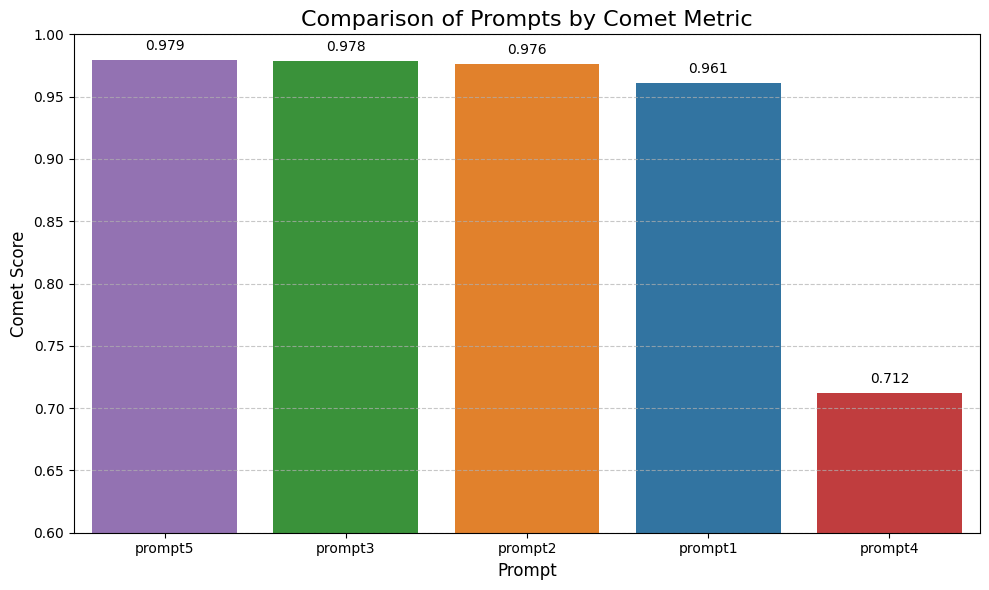

C:\Users\kajet\AppData\Local\Temp\ipykernel_20456\2490275245.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


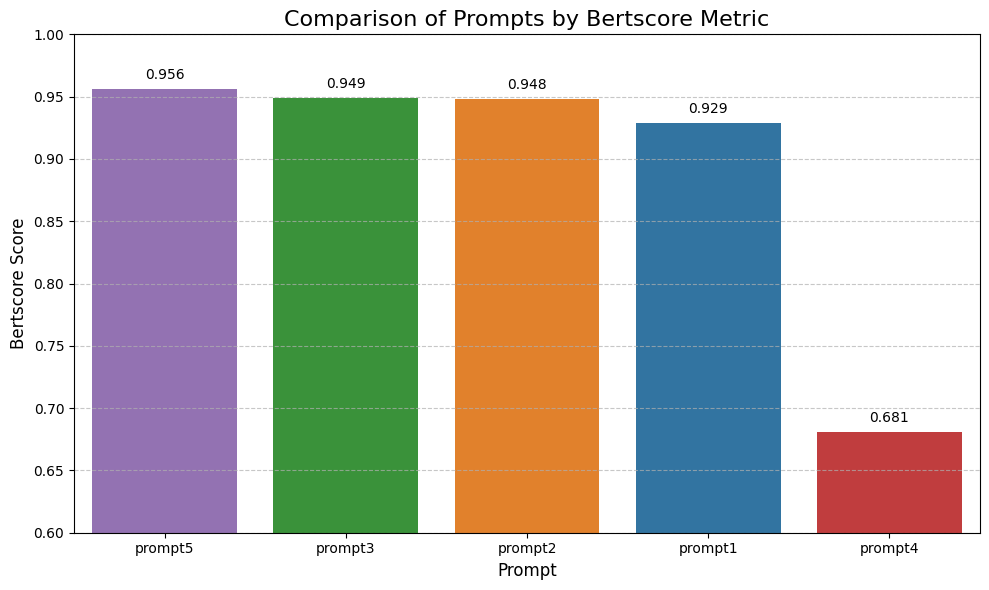

C:\Users\kajet\AppData\Local\Temp\ipykernel_20456\2490275245.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


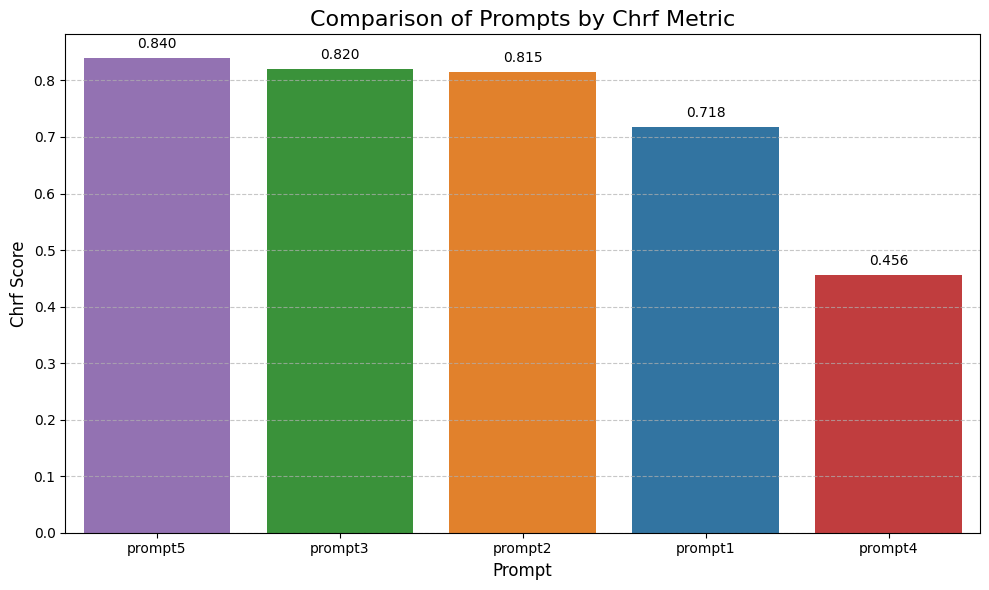

C:\Users\kajet\AppData\Local\Temp\ipykernel_20456\2490275245.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


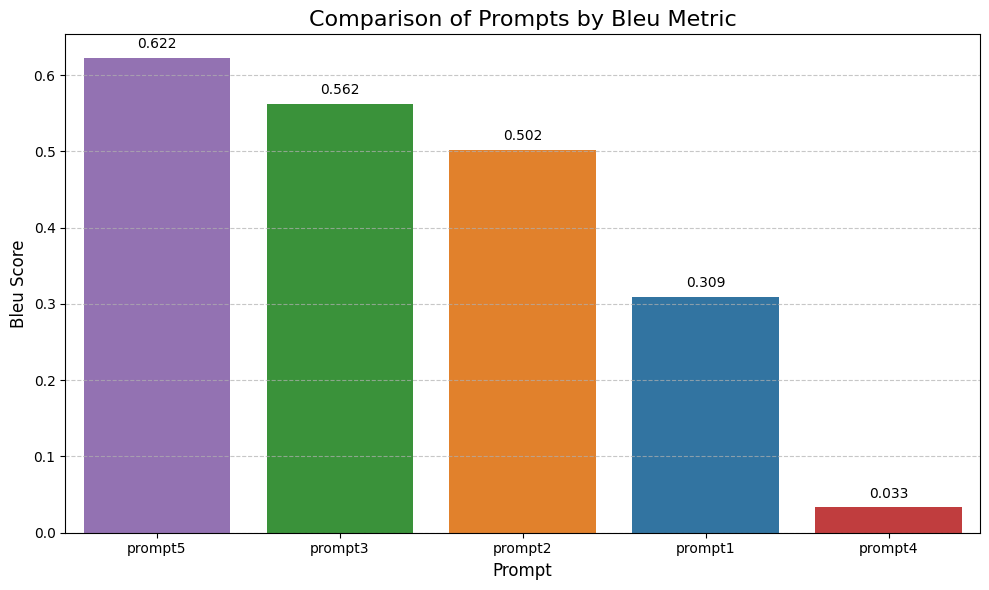

In [4]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in prompts_comparision.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = parts[1]
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in prompts_comparision.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = parts[1]
        score = prompts_comparision[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 1)
    
    plt.tight_layout()
    plt.savefig(f"figs/{metric}_prompt_formats_custom_dataset.png", dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
translations = pd.read_csv("results/custom_dataset_prompts_comparision.csv", sep="|")
translations

,speaker_gender,listener_gender,en_text,pl_text,no_context,prompt1,prompt2,prompt3,prompt4,prompt5
0,mężczyzna,kobieta,"I am the best artist, are you a good artist?","Jestem najlepszym artystą, czy ty jesteś dobrą...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszym artystą, czy ty jesteś dobrą...","Jestem najlepszym artystą, czy ty jesteś dobrą...",### Tłumaczenie:\n\n**Mówca:** Mężczyzna\n**Sł...,"Jestem najlepszym artystą, czy ty jesteś dobry..."
1,kobieta,mężczyzna,"I am the best artist, are you a good artist?","Jestem najlepszą artystką, czy ty jesteś dobry...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszą artystką, czy ty jesteś dobry...","Jestem najlepszą artystką, czy ty jesteś dobry...",Mówca (kobieta): Jestem najlepszą artystką. A ...,"Jestem najlepszą artystką, czy ty jesteś dobry..."
2,mężczyzna,mężczyzna,"I am the best artist, are you a good artist?","Jestem najlepszym artystą, czy ty jesteś dobry...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszym artystą, czy ty jesteś dobry...",### Tłumaczenie na język polski:\n\n**Mówca:**...,"Jestem najlepszym artystą, czy ty jesteś dobry..."
3,kobieta,kobieta,"I am the best artist, are you a good artist?","Jestem najlepszą artystką, czy ty jesteś dobrą...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszym artystą, czy jesteś dobrym a...","Jestem najlepszą artystką, czy jesteś dobrą ar...","Jestem najlepszą artystką, czy ty jesteś dobrą...",Mówca (kobieta): Jestem najlepszą artystką. A ...,"Jestem najlepszą artystką, czy ty jesteś dobrą..."
4,mężczyzna,mężczyzna,"I almost killed him, and what did you do?","Prawie go zabiłem, a ty co zrobiłeś?","Niemal go zabiłem, a co ty zrobiłeś?","Niemal go zabiłem, a co ty zrobiłeś?","Niemal go zabiłem, a co ty zrobiłeś?","Niemal go zabiłem, a co ty zrobiłeś?",Mówca: Mężczyzna\nSłuchacz: Mężczyzna\nAngiels...,"Niemal go zabiłem, a co ty zrobiłeś?"
...,...,...,...,...,...,...,...,...,...,...
115,kobieta,kobieta,I waited for you for almost an hour in the rai...,"Czekałam na ciebie prawie godzinę w deszczu, a...",NaN,"Czekałem na ciebie prawie godzinę w deszczu, a...","Czekałam na ciebie prawie godzinę w deszczu, a...","Czekałam na ciebie prawie godzinę w deszczu, a...",Mówca (kobieta): Czekałam na ciebie prawie god...,"Czekałam na ciebie prawie godzinę w deszczu, a..."
116,mężczyzna,kobieta,I thought we agreed to clean the house togethe...,"Myślałem, że umówiliśmy się na wspólne sprząta...",NaN,"Myślałem, że umówiliśmy się na sprzątanie domu...","Myślałem, że umówiliśmy się na sprzątanie domu...","Myślałem, że umówiliśmy się na sprzątanie domu...","Mówca (mężczyzna): Myślałem, że umówiliśmy się...","Myślałam, że umówiliśmy się na sprzątanie domu..."
117,kobieta,mężczyzna,I thought we agreed to clean the house togethe...,"Myślałam, że umówiliśmy się na wspólne sprząta...",NaN,"Myślałem, że umówiliśmy się na sprzątanie domu...","Myślałam, że umówiliśmy się na sprzątanie domu...","Myślałam, że umówiliśmy się na sprzątanie domu...","Mówca (kobieta): Myślałam, że umówiliśmy się n...","Myślałam, że umówiliśmy się na sprzątanie domu..."
118,mężczyzna,mężczyzna,I thought we agreed to clean the house togethe...,"Myślałem, że umówiliśmy się na wspólne sprząta...",NaN,"Myślałem, że umówiliśmy się na sprzątanie domu...","Myślałem, że umówiliśmy się na sprzątanie domu...","Myślałem, że umówiliśmy się na sprzątanie domu...","Mówca: Myślałem, że umówiliśmy się na sprzątan...","Myślałem, że umówiliśmy się na sprzątanie domu..."


In [6]:
random_samples = translations.sample(n=10, random_state=42)

selected_columns = random_samples[[
    "pl_text", 
    "prompt3", 
    "prompt5"
]]

selected_columns

,pl_text,prompt3,prompt5
44,"Skończyłem raport, czy ukończyłaś prezentację?","Skończyłem raport, czy ukończyłaś prezentację?","Skończyłem raport, czy ukończyłaś prezentację?"
47,"Skończyłam raport, czy ukończyłaś prezentację?","Skończyłam raport, czy udało ci się zrobić pre...",Skończyłam raport. Czy ukończyłaś prezentację?
4,"Prawie go zabiłem, a ty co zrobiłeś?","Niemal go zabiłem, a co ty zrobiłeś?","Niemal go zabiłem, a co ty zrobiłeś?"
55,"Napisałam list, czy go wysłałaś?","Napisałam list, czy go wysłałaś?","Napisałam list, czy go wysłałaś?"
26,"Obejrzałem ten film wczoraj wieczorem, spodoba...","Widziałem ten film zeszłej nocy, podobał ci się?","Obejrzałem ten film wczoraj wieczorem, podobał..."
64,"Siedziałem całą noc przygotowując prezentację,...","Zostałem całą noc przygotowując prezentację, b...","Czekałem całą noc, przygotowując prezentację, ..."
73,"Posprzątałam kuchnię, wyniosłeś chociaż śmieci?","Posprzątałam kuchnię, czy chociaż wyniosłeś śm...","Posprzątałam kuchnię, czy chociaż wyrzuciłeś ś..."
10,Chciałem pomalować moje ściany ale nie pożyczy...,"Chciałem pomalować ściany, ale nie pożyczyłaś ...","Chciałem pomalować ściany, ale nie pożyczyłaś ..."
40,"Wysłałem maila, czy zadzwoniłaś do klienta?","Wysłałem e-maila, czy zadzwoniłaś do klienta?","Wysłałem e-maila, czy zadzwoniła pani do klienta?"
107,"Siedziałam całą noc pomagając ci z projektem, ...","Całą noc pomagałam ci przy twoim projekcie, a ...","Zostałam całą noc, pomagając ci przy projekcie..."


In [5]:
few_shot_comparision = pd.read_csv("translations_scores/system_custom_dataset_few_shot_comparision_basic_metric.csv")
few_shot_comparision

,bleu_prompt6_random,chrf_prompt6_random,comet_prompt6_random,bertscore_prompt6_random,bleu_prompt6_chosen,chrf_prompt6_chosen,comet_prompt6_chosen,bertscore_prompt6_chosen,bleu_prompt7_random,chrf_prompt7_random,comet_prompt7_random,bertscore_prompt7_random,bleu_prompt7_chosen,chrf_prompt7_chosen,comet_prompt7_chosen,bertscore_prompt7_chosen
0,0.430463,0.789406,0.95029,0.930087,0.510294,0.809563,0.958985,0.938182,0.432631,0.778226,0.957564,0.931095,0.493569,0.8083,0.962412,0.940192


In [6]:
values = few_shot_comparision.values.flatten()

# Remove NaNs
values = [v for v in values if pd.notna(v)]

# Round each value to at most 3 decimal places
rounded_values = [round(float(v), 3) for v in values]

# Group into rows of 4
rows = [rounded_values[i:i+4] for i in range(0, len(rounded_values), 4)]

# Print each row in LaTeX tabular format
for row in rows:
    formatted = " & " + " & ".join(f"{v:.3f}" for v in row) + r" \\"
    print(formatted)

 & 0.430 & 0.789 & 0.950 & 0.930 \\
 & 0.510 & 0.810 & 0.959 & 0.938 \\
 & 0.433 & 0.778 & 0.958 & 0.931 \\
 & 0.494 & 0.808 & 0.962 & 0.940 \\


C:\Users\kajet\AppData\Local\Temp\ipykernel_20456\2102229556.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Variant", y="Score", palette="tab10")


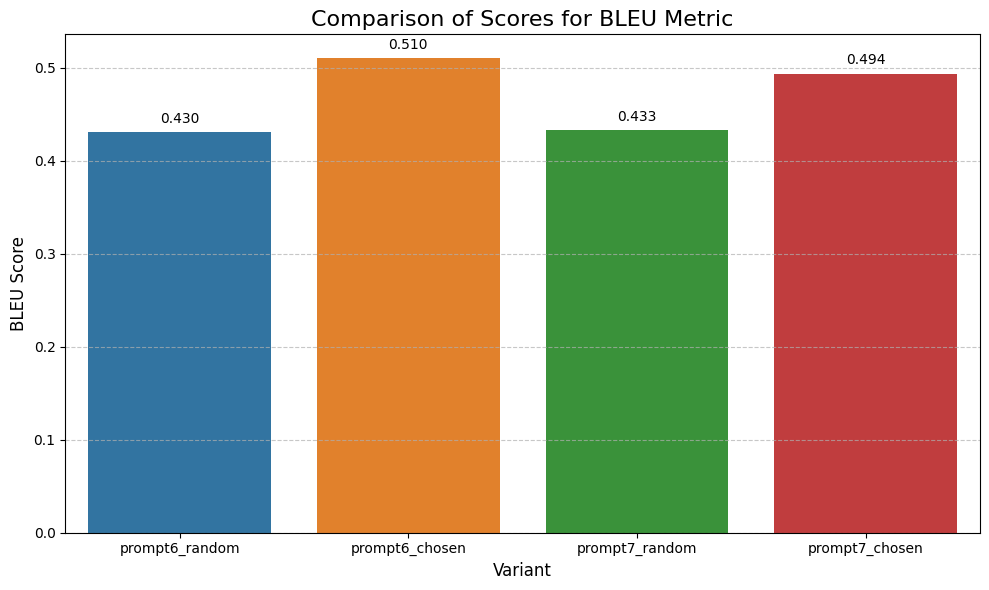

C:\Users\kajet\AppData\Local\Temp\ipykernel_20456\2102229556.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Variant", y="Score", palette="tab10")


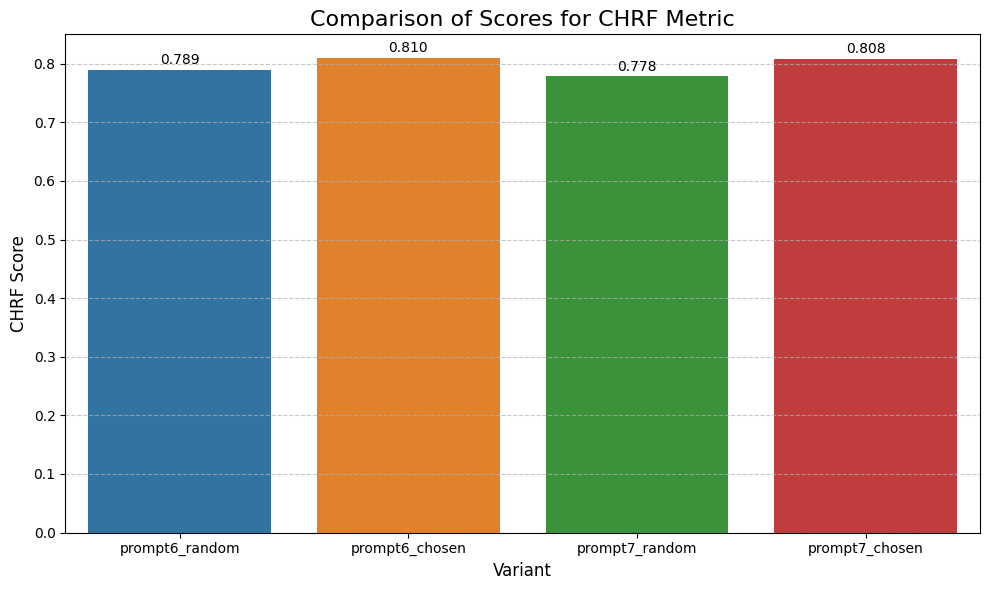

C:\Users\kajet\AppData\Local\Temp\ipykernel_20456\2102229556.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Variant", y="Score", palette="tab10")


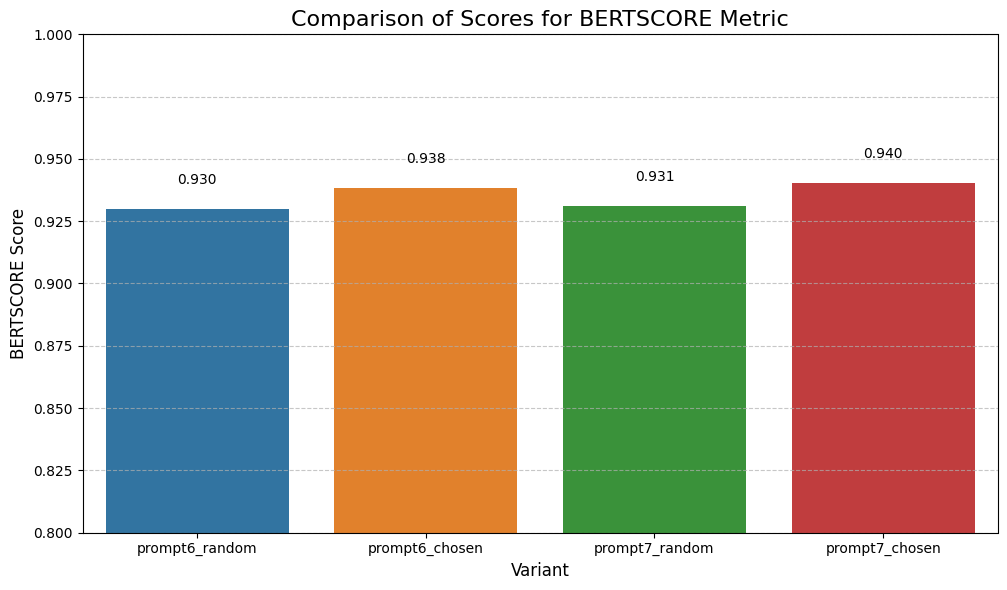

C:\Users\kajet\AppData\Local\Temp\ipykernel_20456\2102229556.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x="Variant", y="Score", palette="tab10")


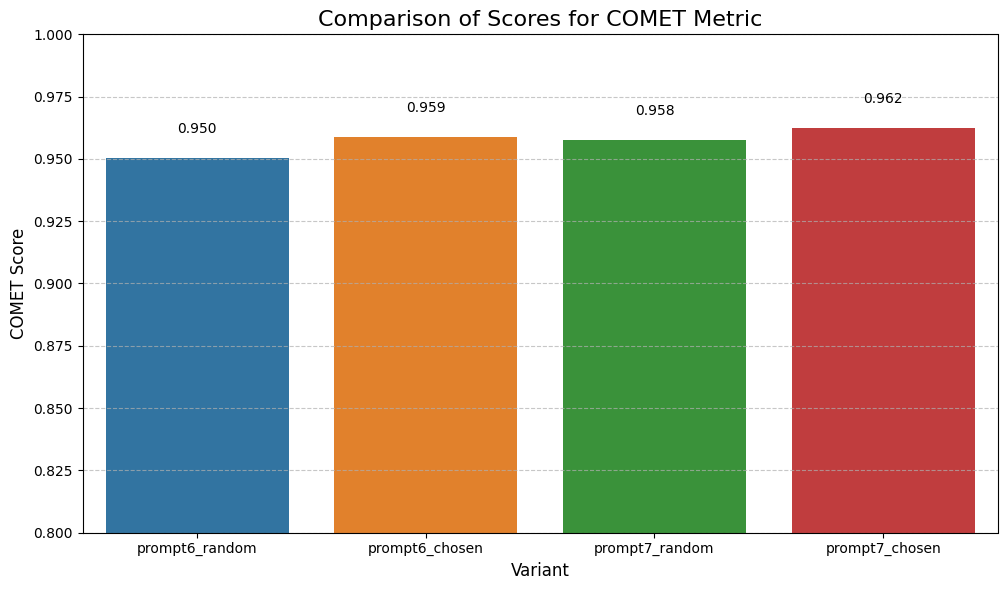

In [6]:
metrics = ["bleu", "chrf", "bertscore", "comet"]
variants = ["prompt6_random", "prompt6_chosen", "prompt7_random", "prompt7_chosen"]

# Loop through each metric and plot a separate graph
for metric in metrics:
    # Select columns corresponding to the current metric
    metric_columns = [f"{metric}_{variant}" for variant in variants]
    
    # Extract the scores for the current metric
    scores = few_shot_comparision[metric_columns].iloc[0]
    
    # Prepare data for plotting
    plot_data = scores.reset_index()
    plot_data.columns = ["Variant", "Score"]
    plot_data["Variant"] = plot_data["Variant"].str.replace(f"{metric}_", "")  # Clean up variant names
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(data=plot_data, x="Variant", y="Score", palette="tab10")
    
    # Add score values on top of each bar
    for index, row in plot_data.iterrows():
        plt.text(index, row["Score"] + 0.01, f"{row['Score']:.3f}", ha="center", fontsize=10)
    
    # Customize the plot
    plt.title(f"Comparison of Scores for {metric.upper()} Metric", fontsize=16)
    plt.xlabel("Variant", fontsize=12)
    plt.ylabel(f"{metric.upper()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.8, 1)
    
    plt.savefig(f"figs/{metric}_few_shot_custom_dataset.png", dpi=300, bbox_inches='tight')
    plt.show()